# IBM HR Attrition Case Study

Attrition is a problem that impacts all businesses, irrespective of geography, industry and size of the company. It is a major problem to an organization, and predicting turnover is at the forefront of the needs of Human Resources (HR) in many organizations. Organizations face huge costs resulting from employee turnover. With advances in machine learning and data science, it’s possible to predict the employee attrition, and we will try to predict that. 

Features:  Age, BusinessTravel, DailyRate, Department, DistanceFromHome, Education, EducationField, EmployeeNumber,
RelationshipSatisfaction, StandardHours, StockOptionLevel,
TotalWorkingYears,TrainTimesLastYear,WorkLifeBalanace,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager

Target: Attrition

In [1]:
# Importing the necessary libraries.

import zipfile
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data Collection And Preprocessing

In [2]:
unzip=zipfile.ZipFile('./Downloads/ibm-hr-analytics-employee-attrition-performance.zip')

In [3]:
hr_data=pd.read_csv(unzip.open('WA_Fn-UseC_-HR-Employee-Attrition.csv'),engine='python')

In [4]:
# Checking the dataset.
hr_data.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [5]:
# Checking the shape of whole dataset.
hr_data.shape

(1470, 35)

There are total 1470 rows and 35 columns in the dataset

In [6]:
# Checking the data summary.
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

There are total 9 columns having object data type and remaing others are int data type.

#  Exploratory Data Analysis(EDA)

 Checking the Data type of all columns in data set separately.

In [7]:
hr_data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

Here also we can see 9 columns with object data types and others are of int data types. 

Checking missing values in the dataset.

In [8]:
hr_data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

There are no null values in the dataset.

In [9]:
# checking the unique values.
hr_data.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

Here almost all columns have unique values but some columns have very huge no. of unique values. 

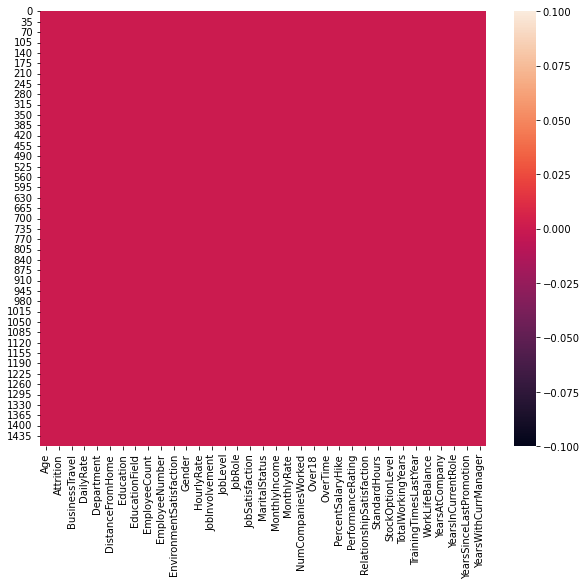

In [10]:
# Visualizing the null values using heatmap.
plt.figure(figsize=(10,8))
sns.heatmap(hr_data.isnull())
plt.show()

After visualization we can definitely say that there are no null values present in the dataset.

In [11]:
# Checking the total column names. 
hr_data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [12]:
# Checking teh Statistical summary of the dataset.

hr_data.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  ...  RelationshipSatisfaction  StandardHours  \
count  1470.000000  ...               1470.000000         1470.0   
mean      2.063946  ...                  2.712245           80.0   
std       1.106940  ...                  1.081209            0.0   
min       1.000000  ...                  1.000000           80.0   
25%       1.000000  ...                  2.000000           80.0   
50%       2.000000  ...                  3.000000           80.0   
75%       3.000000  ...                  4.000000           80.0   
max       5.000000  ...                  4.000000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1470.000000        1470.000000            1470.000000   
mean           0.793878          11.279592               2.799320   
std            0.852077           7.780782               1.289271   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1470.000000     1470.000000         1470.000000   
mean          2.761224        7.008163            4.229252   
std           0.706476        6.126525            3.623137   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1470.000000           1470.000000  
mean                  2.187755              4.123129  
std                   3.222430              3.568136  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 26 columns]

Here the total count is 1470,some columns have higher mean,std.deviation,min value and max value whereas some columns have lower.

In [13]:
# We will drop this columns as there is no need of them for further procedure.
hr_data = hr_data.drop(columns = ['EmployeeNumber', 'EmployeeCount', 'StandardHours', 'Over18'])
hr_data.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                 1          2  Life Sciences                        2   
1                 8          1  Life Sciences                        3   
2                 2          2          Other                        4   
3                 3          4  Life Sciences                        4   
4                 2          1        Medical                        1   

   Gender  ...  PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0  Female  ...                  3                         1                 0   
1    Male  ...                  4                         4                 1   
2    Male  ...                  3                         2                 0   
3  Female  ...                  3                         3                 0   
4    Male  ...                  3                         4                 1   

  TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                 8                      0               1               6   
1                10                      3               3              10   
2                 7                      3               3               0   
3                 8                      3               3               8   
4                 6                      3               3               2   

   YearsInCurrentRole  YearsSinceLastPromotion YearsWithCurrManager  
0                   4                        0                    5  
1                   7                        1                    7  
2                   0                        0                    0  
3                   7                        3                    0  
4                   2                        2                    2  

[5 rows x 31 columns]

# Data Visualization

<AxesSubplot:xlabel='Attrition', ylabel='count'>

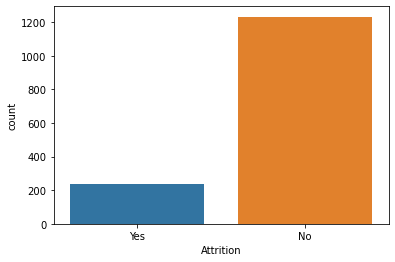

In [14]:
# Checking the Attrition column using countplot.

sns.countplot(x='Attrition',data=hr_data)

 Attrition is lower in blue color and more in orange color,it shows the dataset is quite imbalanced.

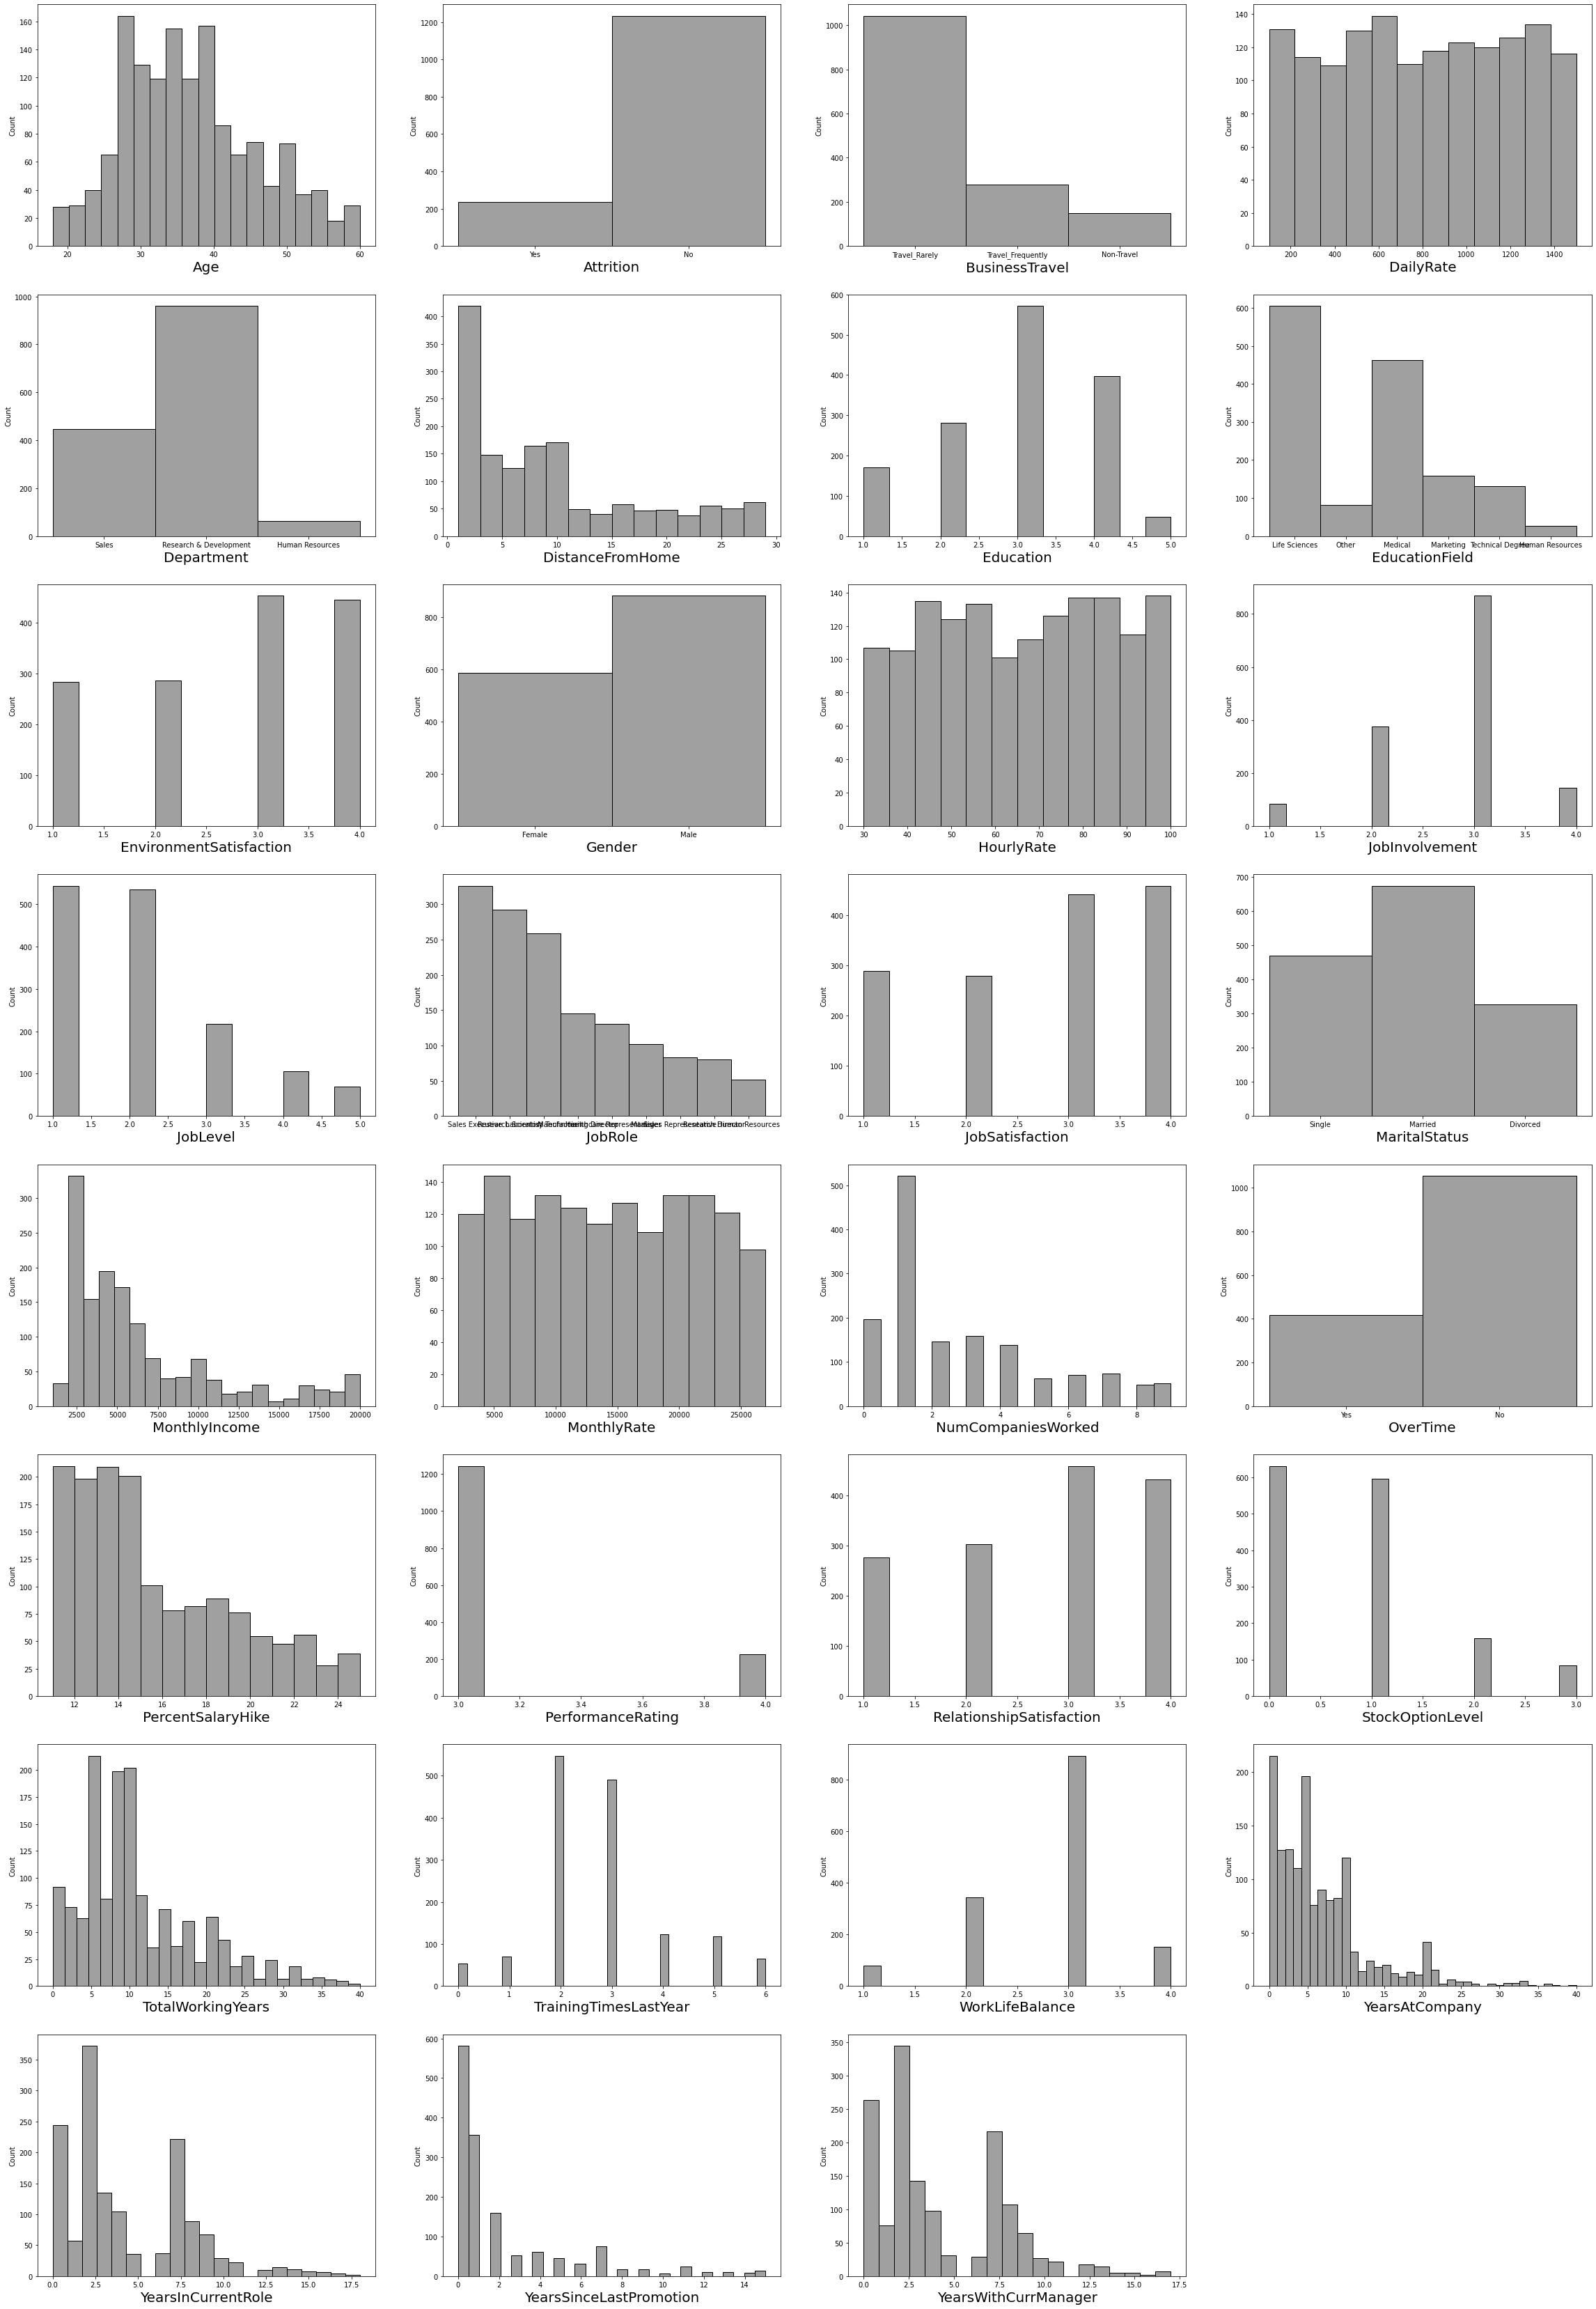

In [15]:
# Checking the feature and target columns using histogram plot.
plt.figure(figsize=(40,60),facecolor='white')
plotnumber=1
 
for column in hr_data:
    if plotnumber<=40:
        ax=plt.subplot(8,4,plotnumber)
        sns.histplot(hr_data[column],color='grey')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1   
plt.show()      

Here in the above hist plot we can see the dataset is fluctuating through the bars as in each feature columns the bars are having much distance from each other that means the values are differing.

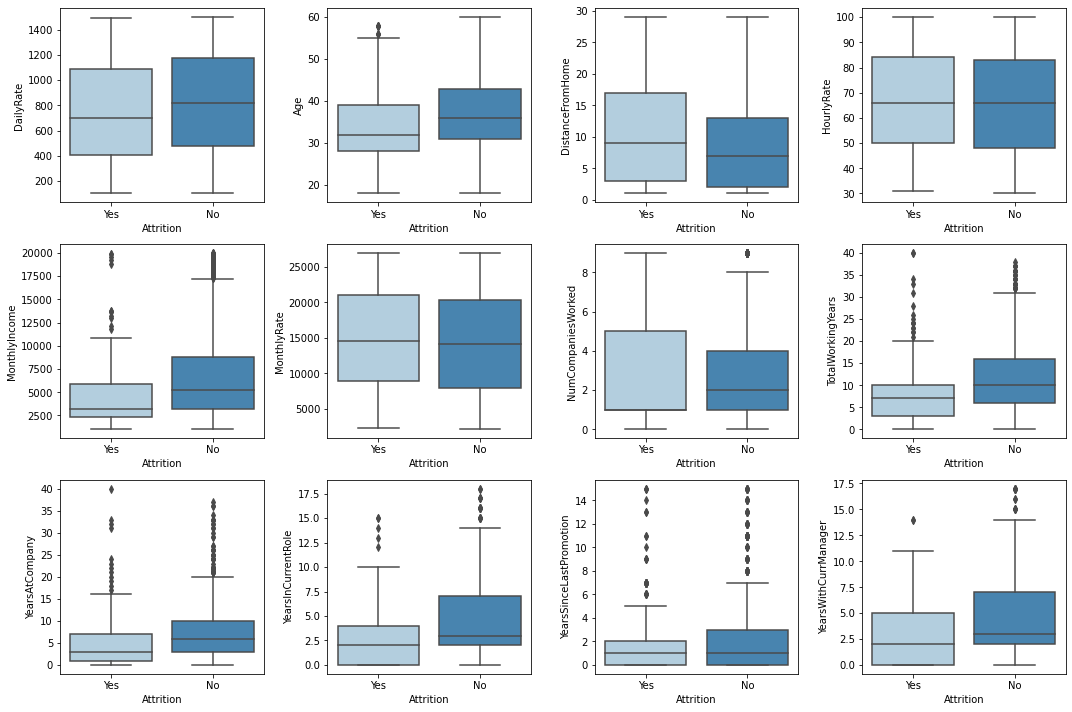

In [16]:
# Checking the numerical columns using box plot.

fig, axes = plt.subplots(3,4, figsize=[15,10])
sns.boxplot(x='Attrition', y ='DailyRate', data=hr_data, ax=axes[0][0],palette="Blues")
sns.boxplot(x='Attrition', y ='Age', data=hr_data, ax=axes[0][1],palette="Blues")
sns.boxplot(x='Attrition', y ='DistanceFromHome', data=hr_data, ax=axes[0][2],palette="Blues")
sns.boxplot(x='Attrition', y ='HourlyRate', data=hr_data, ax=axes[0][3],palette="Blues")
sns.boxplot(x='Attrition', y ='MonthlyIncome', data=hr_data, ax=axes[1][0],palette="Blues")
sns.boxplot(x='Attrition', y ='MonthlyRate', data=hr_data, ax=axes[1][1],palette="Blues")
sns.boxplot(x='Attrition', y ='NumCompaniesWorked', data=hr_data, ax=axes[1][2],palette="Blues")
sns.boxplot(x='Attrition', y ='TotalWorkingYears', data=hr_data, ax=axes[1][3],palette="Blues")
sns.boxplot(x='Attrition', y ='YearsAtCompany', data=hr_data, ax=axes[2][0],palette="Blues")
sns.boxplot(x='Attrition', y ='YearsInCurrentRole', data=hr_data, ax=axes[2][1],palette="Blues")
sns.boxplot(x='Attrition', y ='YearsSinceLastPromotion', data=hr_data, ax=axes[2][2],palette="Blues")
sns.boxplot(x='Attrition', y ='YearsWithCurrManager', data=hr_data, ax=axes[2][3],palette="Blues")
plt.tight_layout()

Here we can see some columns have outliers present in them, we will deal with them further.

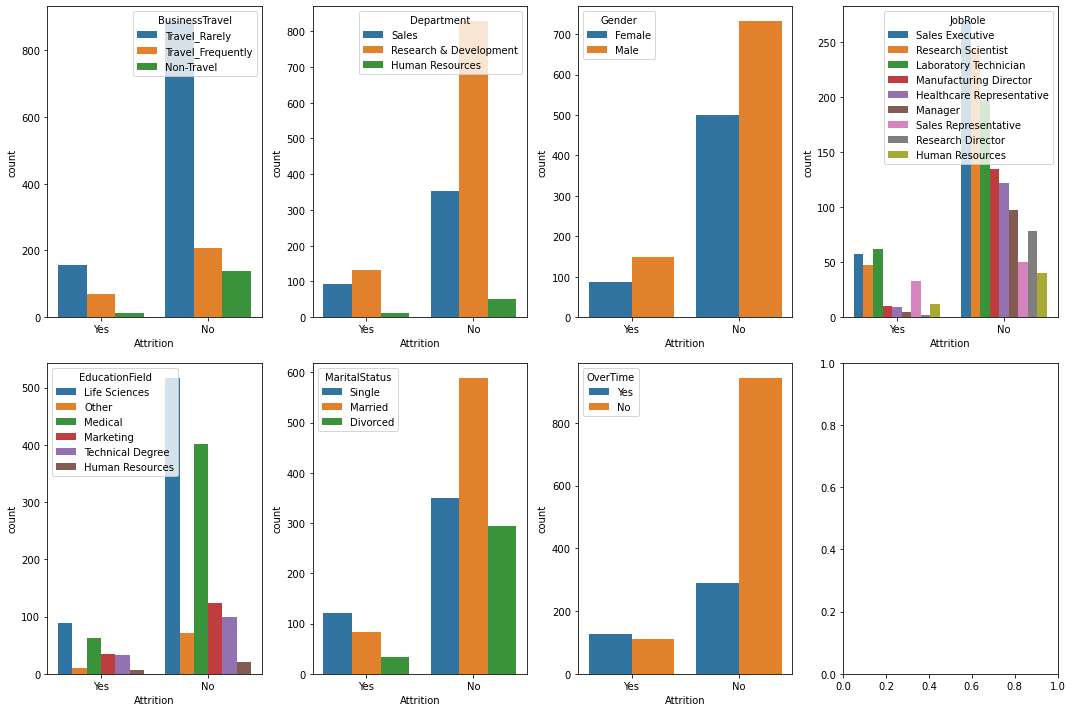

In [17]:
# Checking the categorical columns in accordance with Target column Attrition.

fig,axes = plt.subplots(2,4, figsize=[15,10])
sns.countplot(x='Attrition', hue='BusinessTravel', data=hr_data, ax=axes[0][0])
sns.countplot(x='Attrition', hue='Department', data=hr_data, ax=axes[0][1])
sns.countplot(x='Attrition', hue='Gender', data=hr_data, ax=axes[0][2])
sns.countplot(x='Attrition', hue='JobRole', data=hr_data, ax=axes[0][3])
sns.countplot(x='Attrition', hue='EducationField', data=hr_data, ax=axes[1][0])
sns.countplot(x='Attrition', hue='MaritalStatus', data=hr_data, ax=axes[1][1])
sns.countplot(x='Attrition', hue='OverTime', data=hr_data, ax=axes[1][2])
plt.tight_layout()


From the above figure we can see that there is much difference in Yes and No Attrition that means they are imbalanced.

<Figure size 2880x4320 with 0 Axes>

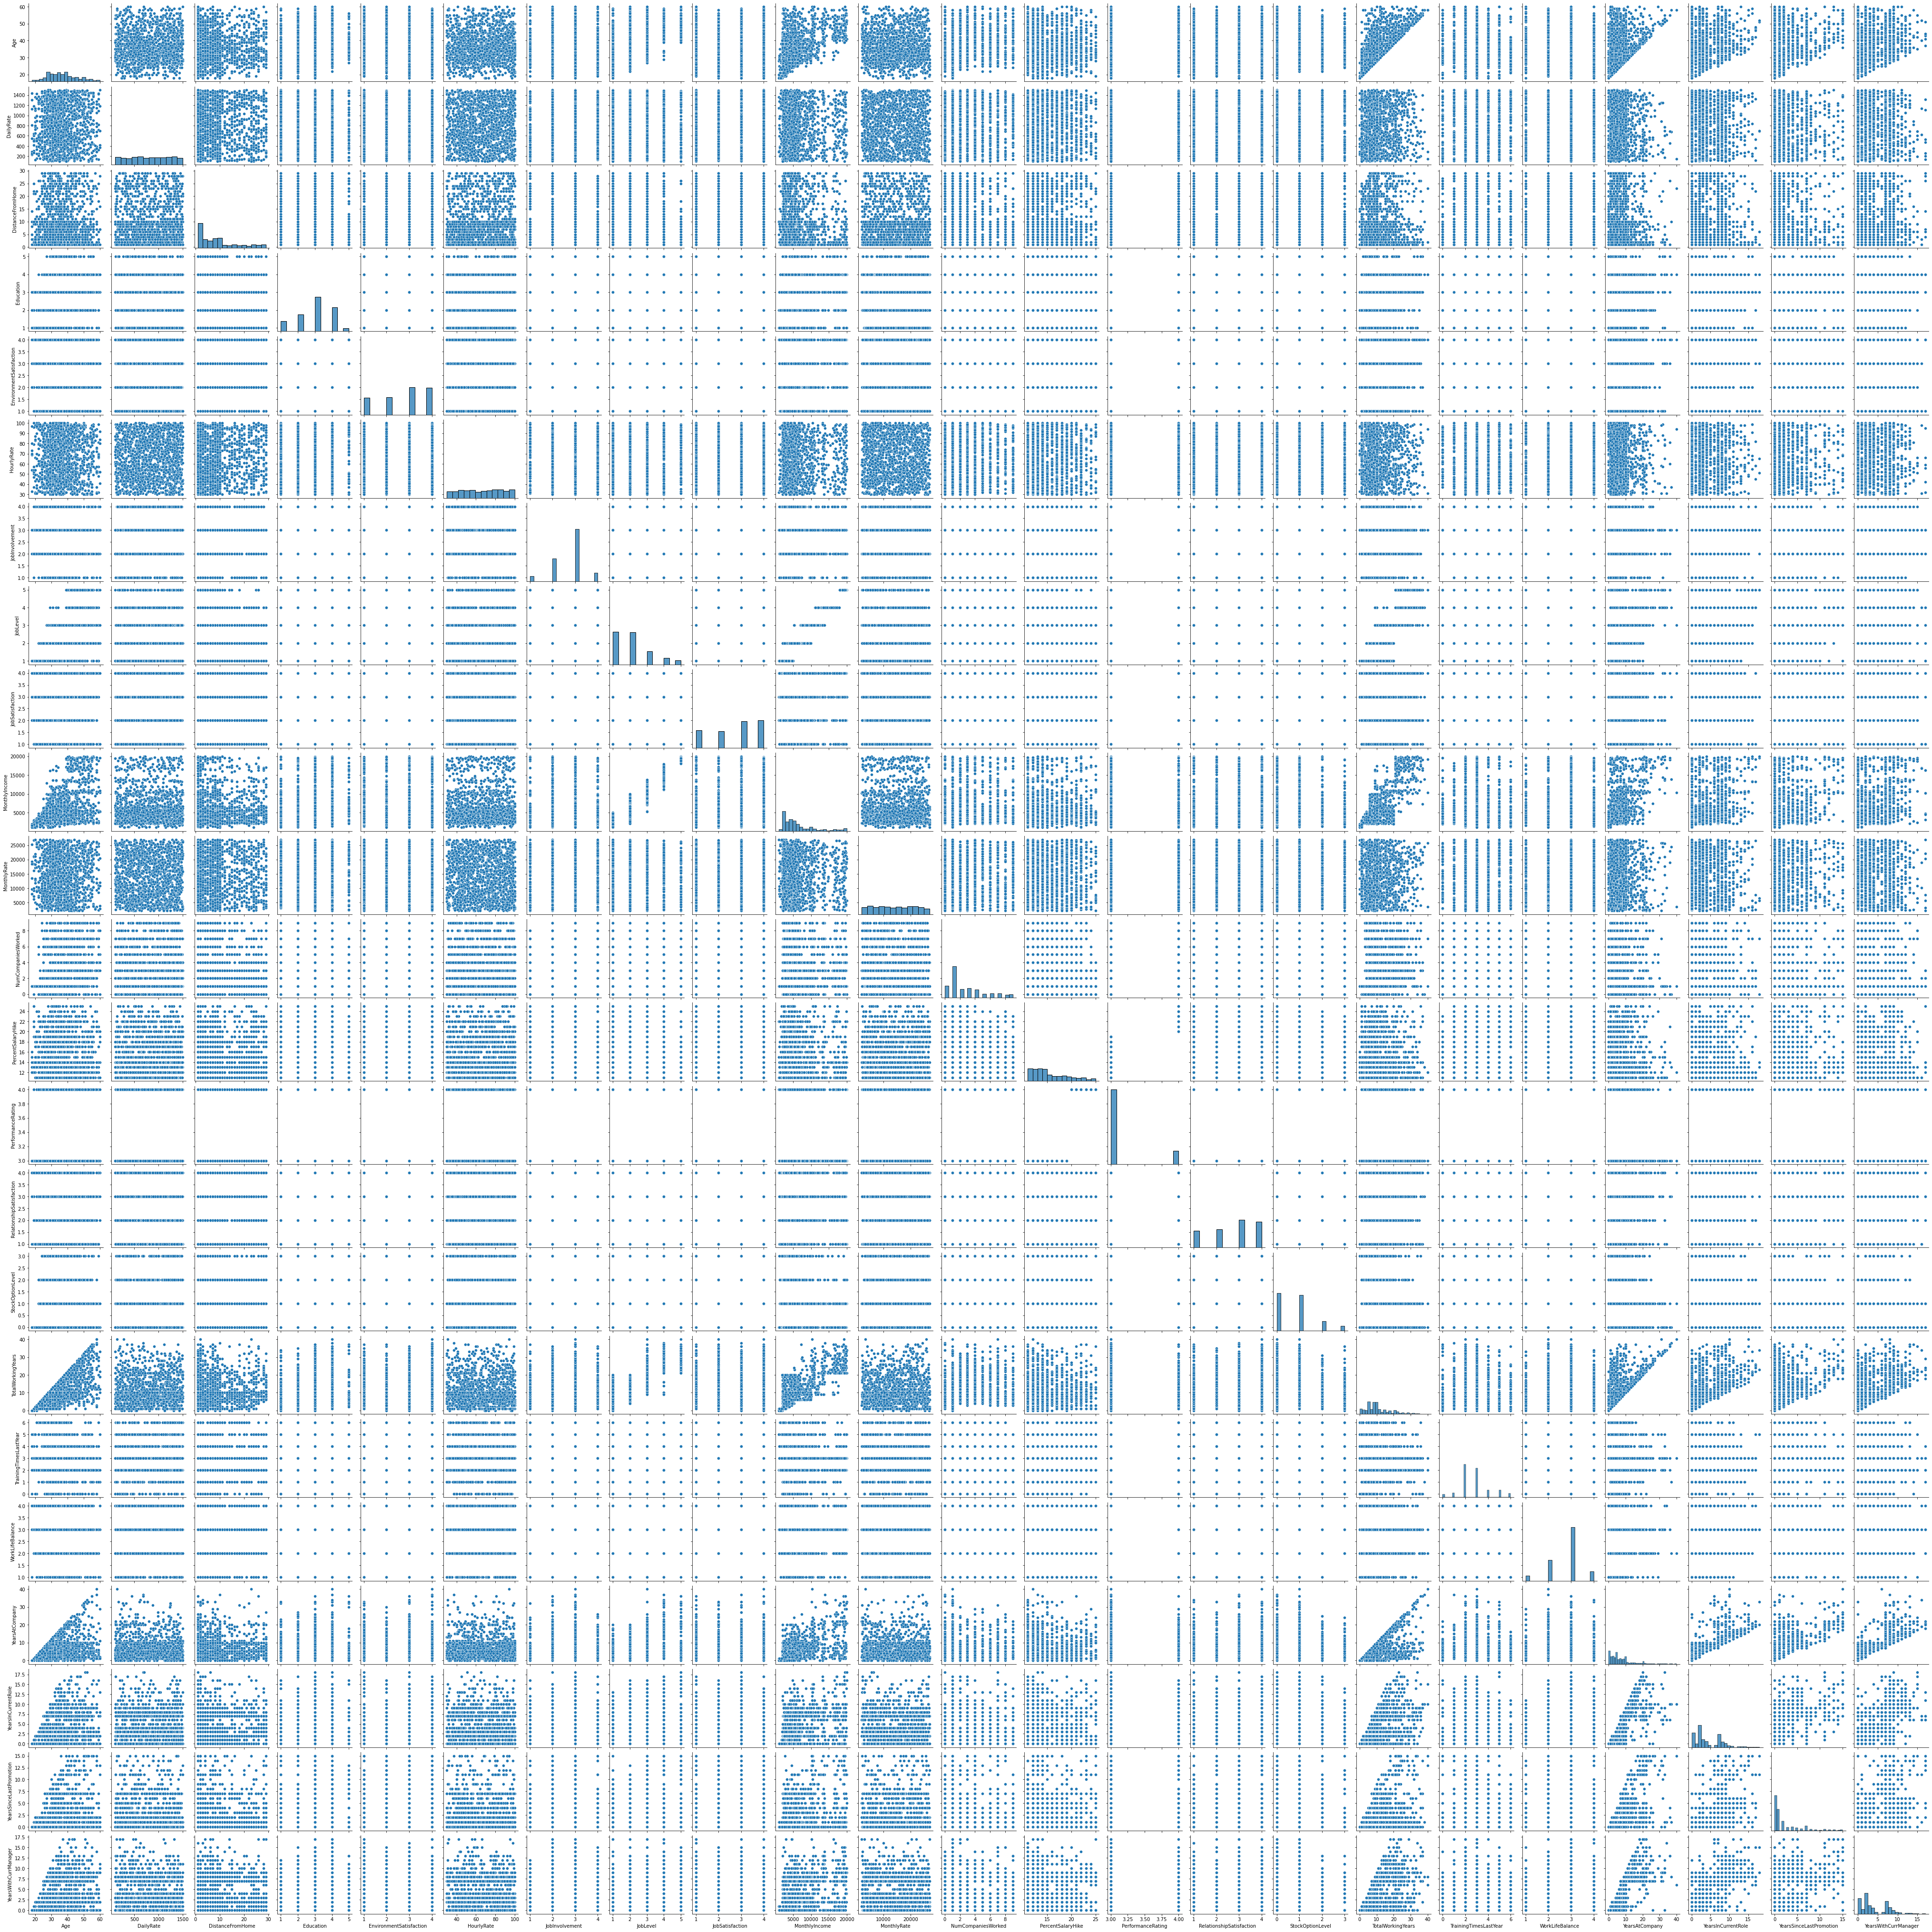

In [18]:
# Multivariate Analysis using pairplot.

plt.figure(figsize=(40,60))
sns.pairplot(hr_data)
plt.show()

In the above figure we can see the histogram plot in the diagonal and after analysing the figure some features are showing linear realtionship and some aren't showing any relationship.

We succesfully encoded the categorical column

In [18]:
# tranform binary feature into 0 and 1
hr_data['Attrition'] = hr_data['Attrition'].map({'Yes': 1, 'No': 0})
hr_data['OverTime'] = hr_data['OverTime'].map({'Yes': 1, 'No': 0})

In [19]:
hr_data.shape

(1470, 31)

In [20]:
# Checking the Correlation.

correlation = hr_data[['Age', 'DailyRate', 'DistanceFromHome', 'Education',
        'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
        'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
        'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
        'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
        'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
        'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition']].corr()

In [21]:
correlation

Age  DailyRate  DistanceFromHome  Education  \
Age                       1.000000   0.010661         -0.001686   0.208034   
DailyRate                 0.010661   1.000000         -0.004985  -0.016806   
DistanceFromHome         -0.001686  -0.004985          1.000000   0.021042   
Education                 0.208034  -0.016806          0.021042   1.000000   
EnvironmentSatisfaction   0.010146   0.018355         -0.016075  -0.027128   
HourlyRate                0.024287   0.023381          0.031131   0.016775   
JobInvolvement            0.029820   0.046135          0.008783   0.042438   
JobLevel                  0.509604   0.002966          0.005303   0.101589   
JobSatisfaction          -0.004892   0.030571         -0.003669  -0.011296   
MonthlyIncome             0.497855   0.007707         -0.017014   0.094961   
MonthlyRate               0.028051  -0.032182          0.027473  -0.026084   
NumCompaniesWorked        0.299635   0.038153         -0.029251   0.126317   
PercentSalaryHike         0.003634   0.022704          0.040235  -0.011111   
PerformanceRating         0.001904   0.000473          0.027110  -0.024539   
RelationshipSatisfaction  0.053535   0.007846          0.006557  -0.009118   
StockOptionLevel          0.037510   0.042143          0.044872   0.018422   
TotalWorkingYears         0.680381   0.014515          0.004628   0.148280   
TrainingTimesLastYear    -0.019621   0.002453         -0.036942  -0.025100   
WorkLifeBalance          -0.021490  -0.037848         -0.026556   0.009819   
YearsAtCompany            0.311309  -0.034055          0.009508   0.069114   
YearsInCurrentRole        0.212901   0.009932          0.018845   0.060236   
YearsSinceLastPromotion   0.216513  -0.033229          0.010029   0.054254   
YearsWithCurrManager      0.202089  -0.026363          0.014406   0.069065   
Attrition                -0.159205  -0.056652          0.077924  -0.031373   

                          EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
Age                                      0.010146    0.024287        0.029820   
DailyRate                                0.018355    0.023381        0.046135   
DistanceFromHome                        -0.016075    0.031131        0.008783   
Education                               -0.027128    0.016775        0.042438   
EnvironmentSatisfaction                  1.000000   -0.049857       -0.008278   
HourlyRate                              -0.049857    1.000000        0.042861   
JobInvolvement                          -0.008278    0.042861        1.000000   
JobLevel                                 0.001212   -0.027853       -0.012630   
JobSatisfaction                         -0.006784   -0.071335       -0.021476   
MonthlyIncome                           -0.006259   -0.015794       -0.015271   
MonthlyRate                              0.037600   -0.015297       -0.016322   
NumCompaniesWorked                       0.012594    0.022157        0.015012   
PercentSalaryHike                       -0.031701   -0.009062       -0.017205   
PerformanceRating                       -0.029548   -0.002172       -0.029071   
RelationshipSatisfaction                 0.007665    0.001330        0.034297   
StockOptionLevel                         0.003432    0.050263        0.021523   
TotalWorkingYears                       -0.002693   -0.002334       -0.005533   
TrainingTimesLastYear                   -0.019359   -0.008548       -0.015338   
WorkLifeBalance                          0.027627   -0.004607       -0.014617   
YearsAtCompany                           0.001458   -0.019582       -0.021355   
YearsInCurrentRole                       0.018007   -0.024106        0.008717   
YearsSinceLastPromotion                  0.016194   -0.026716       -0.024184   
YearsWithCurrManager                    -0.004999   -0.020123        0.025976   
Attrition                               -0.103369   -0.006846       -0.130016   

                          JobLevel  JobSatisfaction  M

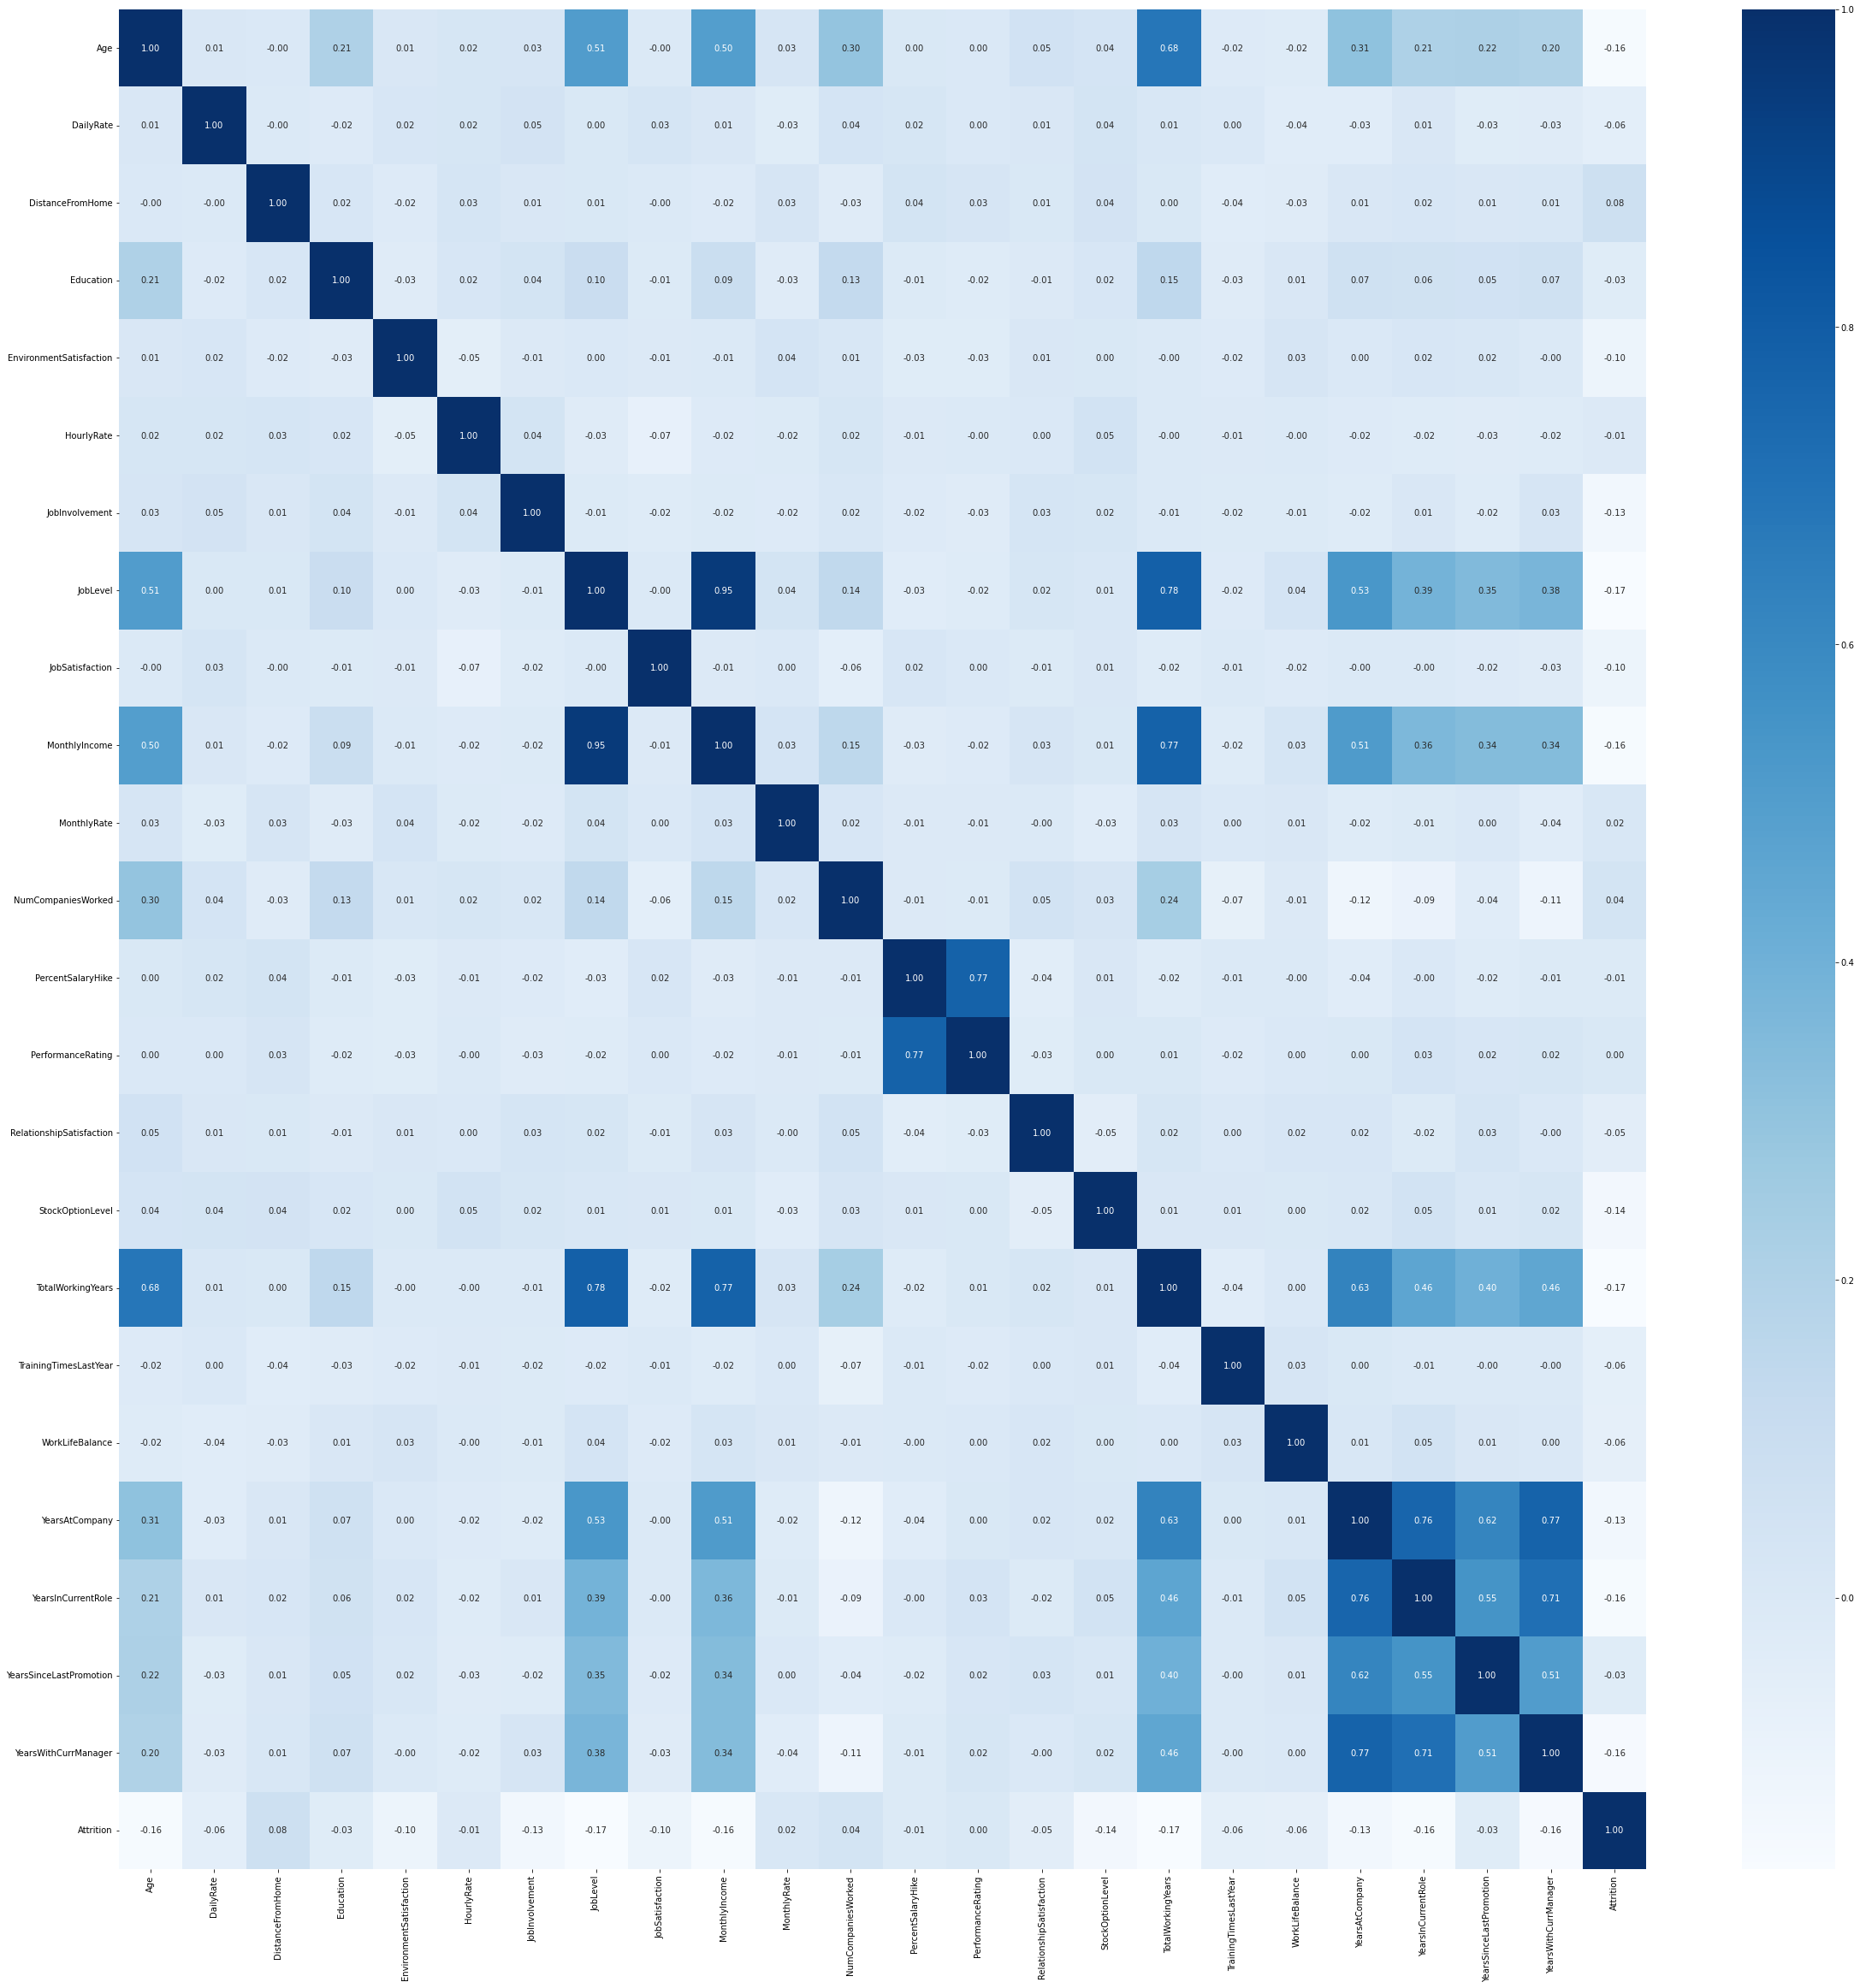

In [22]:
# Let's Visualize the correlation to conclude some results.
plt.figure(figsize=(40,40))
sns.heatmap(correlation,annot=True,cmap='Blues',fmt='0.2f')
plt.show()

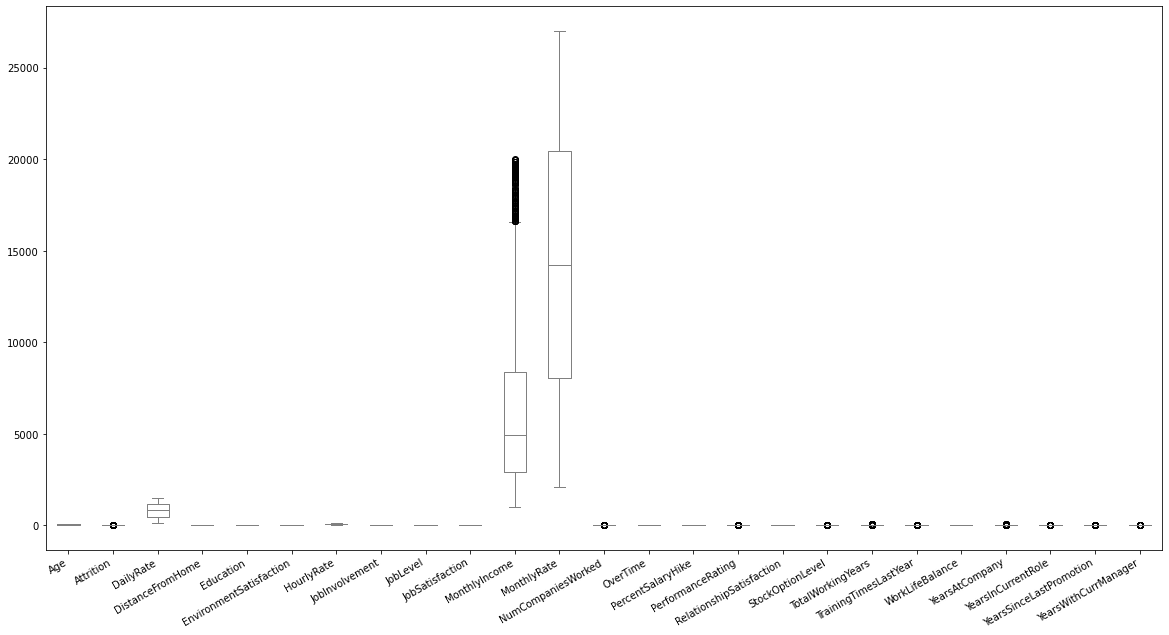

In [23]:
hr_data.plot(kind='box',fontsize=10,figsize=(20,10),color='grey')
plt.xticks(rotation=30,ha='right')
plt.show()

Here we can see some columns have outliers present in them we will treat them with zscore.

In [24]:
outliers=hr_data[['Attrition','NumCompaniesWorked','PerformanceRating','StockOptionLevel','TotalWorkingYears','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]

In [25]:
from scipy.stats import zscore
z=np.abs(zscore(outliers))
data_clear=hr_data[(z<3).all(axis=1)]
data_clear.head()

Age  Attrition     BusinessTravel  DailyRate              Department  \
0   41          1      Travel_Rarely       1102                   Sales   
1   49          0  Travel_Frequently        279  Research & Development   
2   37          1      Travel_Rarely       1373  Research & Development   
3   33          0  Travel_Frequently       1392  Research & Development   
4   27          0      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                 1          2  Life Sciences                        2   
1                 8          1  Life Sciences                        3   
2                 2          2          Other                        4   
3                 3          4  Life Sciences                        4   
4                 2          1        Medical                        1   

   Gender  ...  PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0  Female  ...                  3                         1                 0   
1    Male  ...                  4                         4                 1   
2    Male  ...                  3                         2                 0   
3  Female  ...                  3                         3                 0   
4    Male  ...                  3                         4                 1   

  TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                 8                      0               1               6   
1                10                      3               3              10   
2                 7                      3               3               0   
3                 8                      3               3               8   
4                 6                      3               3               2   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                   4                        0                     5  
1                   7                        1                     7  
2                   0                        0                     0  
3                   7                        3                     0  
4                   2                        2                     2  

[5 rows x 31 columns]

In [26]:
data_clear.shape

(1387, 31)

In [27]:
hr_data.shape

(1470, 31)

In [28]:
# Data loss after outlier removal.
Data_loss=((1470-1387)/1470)*100
Data_loss

5.646258503401361

There is not that much data loss after outlier removal, it is not more than 10%.

In [29]:
import warnings 
warnings.filterwarnings('ignore')

# Checking the skewness in the dataset.
data_clear.skew()

Age                         0.472280
Attrition                   1.805983
DailyRate                  -0.017078
DistanceFromHome            0.954752
Education                  -0.289024
EnvironmentSatisfaction    -0.325285
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    1.126075
JobSatisfaction            -0.345612
MonthlyIncome               1.544770
MonthlyRate                 0.030596
NumCompaniesWorked          1.037715
OverTime                    0.954751
PercentSalaryHike           0.800592
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.962332
TotalWorkingYears           1.034487
TrainingTimesLastYear       0.577614
WorkLifeBalance            -0.557100
YearsAtCompany              1.248623
YearsInCurrentRole          0.726675
YearsSinceLastPromotion     1.756335
YearsWithCurrManager        0.694506
dtype: float64

In [30]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [31]:
data_clear[['Attrition','JobLevel','MonthlyIncome','NumCompaniesWorked','OverTime','PercentSalaryHike','PerformanceRating','StockOptionLevel','TotalWorkingYears','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']] = scaler.fit_transform(data_clear[['Attrition','JobLevel','MonthlyIncome','NumCompaniesWorked','OverTime','PercentSalaryHike','PerformanceRating','StockOptionLevel','TotalWorkingYears','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']].values)


In [32]:
data_clear.skew()

Age                         0.472280
Attrition                   1.805983
DailyRate                  -0.017078
DistanceFromHome            0.954752
Education                  -0.289024
EnvironmentSatisfaction    -0.325285
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    0.110769
JobSatisfaction            -0.345612
MonthlyIncome               0.027700
MonthlyRate                 0.030596
NumCompaniesWorked          0.016175
OverTime                    0.954751
PercentSalaryHike           0.112128
PerformanceRating           0.000000
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.089929
TotalWorkingYears          -0.009666
TrainingTimesLastYear       0.577614
WorkLifeBalance            -0.557100
YearsAtCompany             -0.025230
YearsInCurrentRole         -0.069631
YearsSinceLastPromotion     0.212301
YearsWithCurrManager       -0.070570
dtype: float64

We successfully removed the skewness.

In [33]:
y = hr_data.iloc[:, 1]
X = hr_data
  
X.drop('Attrition',
       axis = 1, 
       inplace = True)

In [34]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
y = lb.fit_transform(y)

In [35]:
X = pd.get_dummies(X, columns = ['BusinessTravel', 'Gender','MaritalStatus','Department','OverTime','EducationField'], drop_first = True)
X = pd.get_dummies(X)
X.head()

Age  DailyRate  DistanceFromHome  Education  EnvironmentSatisfaction  \
0   41       1102                 1          2                        2   
1   49        279                 8          1                        3   
2   37       1373                 2          2                        4   
3   33       1392                 3          4                        4   
4   27        591                 2          1                        1   

   HourlyRate  JobInvolvement  JobLevel  JobSatisfaction  MonthlyIncome  ...  \
0          94               3         2                4           5993  ...   
1          61               2         2                2           5130  ...   
2          92               2         1                3           2090  ...   
3          56               3         1                3           2909  ...   
4          40               3         1                2           3468  ...   

   EducationField_Technical Degree  JobRole_Healthcare Representative  \
0                                0                                  0   
1                                0                                  0   
2                                0                                  0   
3                                0                                  0   
4                                0                                  0   

   JobRole_Human Resources  JobRole_Laboratory Technician  JobRole_Manager  \
0                        0                              0                0   
1                        0                              0                0   
2                        0                              1                0   
3                        0                              0                0   
4                        0                              1                0   

   JobRole_Manufacturing Director  JobRole_Research Director  \
0                               0                          0   
1                               0                          0   
2                               0                          0   
3                               0                          0   
4                               0                          0   

   JobRole_Research Scientist  JobRole_Sales Executive  \
0                           0                        1   
1                           1                        0   
2                           0                        0   
3                           1                        0   
4                           0                        0   

   JobRole_Sales Representative  
0                             0  
1                             0  
2                             0  
3                             0  
4                             0  

[5 rows x 45 columns]

In [36]:
print(X.shape)

(1470, 45)


In [37]:
print(y.shape)

(1470,)


In [38]:
print(list(X.columns))

['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely', 'Gender_Male', 'MaritalStatus_Married', 'MaritalStatus_Single', 'Department_Research & Development', 'Department_Sales', 'OverTime_1', 'EducationField_Life Sciences', 'EducationField_Marketing', 'EducationField_Medical', 'EducationField_Other', 'EducationField_Technical Degree', 'JobRole_Healthcare Representative', 'JobRole_Human Resources', 'JobRole_Laboratory Technician', 'JobRole_Manager', 'JobRole_Manufacturing Director', 'JobRole_Research Director', 'JobRole_Research Scientist',

In [39]:
# Separating the features whcich needs standardization.

Scaled = ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 
                   'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 
                   'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 
                   'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 
                   'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 
                   'YearsWithCurrManager']

In [40]:
# Applying standard scaler to the above features.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
for column in Scaled:
    X[column] = X[column].astype(float)
    X[[column]] = scaler.fit_transform(X[[column]])


In [41]:
# Checking the dataset after applying standard scaler.
X.head()

Age  DailyRate  DistanceFromHome  Education  EnvironmentSatisfaction  \
0  0.446350   0.742527         -1.010909  -0.891688                -0.660531   
1  1.322365  -1.297775         -0.147150  -1.868426                 0.254625   
2  0.008343   1.414363         -0.887515  -0.891688                 1.169781   
3 -0.429664   1.461466         -0.764121   1.061787                 1.169781   
4 -1.086676  -0.524295         -0.887515  -1.868426                -1.575686   

   HourlyRate  JobInvolvement  JobLevel  JobSatisfaction  MonthlyIncome  ...  \
0    1.383138        0.379672 -0.057788         1.153254      -0.108350  ...   
1   -0.240677       -1.026167 -0.057788        -0.660853      -0.291719  ...   
2    1.284725       -1.026167 -0.961486         0.246200      -0.937654  ...   
3   -0.486709        0.379672 -0.961486         0.246200      -0.763634  ...   
4   -1.274014        0.379672 -0.961486        -0.660853      -0.644858  ...   

   EducationField_Technical Degree  JobRole_Healthcare Representative  \
0                                0                                  0   
1                                0                                  0   
2                                0                                  0   
3                                0                                  0   
4                                0                                  0   

   JobRole_Human Resources  JobRole_Laboratory Technician  JobRole_Manager  \
0                        0                              0                0   
1                        0                              0                0   
2                        0                              1                0   
3                        0                              0                0   
4                        0                              1                0   

   JobRole_Manufacturing Director  JobRole_Research Director  \
0                               0                          0   
1                               0                          0   
2                               0                          0   
3                               0                          0   
4                               0                          0   

   JobRole_Research Scientist  JobRole_Sales Executive  \
0                           0                        1   
1                           1                        0   
2                           0                        0   
3                           1                        0   
4                           0                        0   

   JobRole_Sales Representative  
0                             0  
1                             0  
2                             0  
3                             0  
4                             0  

[5 rows x 45 columns]

Checking the multicolinearity in dataset using VIF.

In [76]:
# Checking the multicolinearity after applying VIF to data.

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

vif_Features                           Features
0       2.083223                                Age
1       1.034936                          DailyRate
2       1.022804                   DistanceFromHome
3       1.083566                          Education
4       1.030079            EnvironmentSatisfaction
5       1.026771                         HourlyRate
6       1.032524                     JobInvolvement
7      14.140113                           JobLevel
8       1.024957                    JobSatisfaction
9      18.122028                      MonthlyIncome
10      1.021505                        MonthlyRate
11      1.282276                 NumCompaniesWorked
12      2.564485                  PercentSalaryHike
13      2.550475                  PerformanceRating
14      1.027607           RelationshipSatisfaction
15      1.913844                   StockOptionLevel
16      5.012645                  TotalWorkingYears
17      1.036643              TrainingTimesLastYear
18      1.029390                    WorkLifeBalance
19      4.753568                     YearsAtCompany
20      2.795542                 YearsInCurrentRole
21      1.717768            YearsSinceLastPromotion
22      2.847086               YearsWithCurrManager
23      2.368908   BusinessTravel_Travel_Frequently
24      2.377619       BusinessTravel_Travel_Rarely
25      1.032274                        Gender_Male
26      1.854491              MaritalStatus_Married
27      3.047437               MaritalStatus_Single
28     44.048344  Department_Research & Development
29     43.955448                   Department_Sales
30      1.034752                         OverTime_1
31     24.117380       EducationField_Life Sciences
32     10.895860           EducationField_Marketing
33     21.670489             EducationField_Medical
34      6.044535               EducationField_Other
35      8.873852    EducationField_Technical Degree
36     18.986181  JobRole_Healthcare Representative
37      2.859870            JobRole_Human Resources
38     36.951959      JobRole_Laboratory Technician
39     14.059299                    JobRole_Manager
40     20.889016     JobRole_Manufacturing Director
41     13.323358          JobRole_Research Director
42     41.627390         JobRole_Research Scientist
43     48.036424            JobRole_Sales Executive
44     13.183170       JobRole_Sales Representative

Multicollinearity only affects the predictor variables that are correlated with one another. As we are interested in a predictor variable in the model that doesn’t suffer from multicollinearity, then multicollinearity isn’t a concern for us.

# Splitting the Dataset into train and test data.

In [42]:
# Importing the necessary libraries.

from sklearn.model_selection import train_test_split
  
X_train, X_test, y_train, y_test = train_test_split(
  
   X, y, test_size = 0.25, random_state = 40)

In [43]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [44]:
# Applying RandomForest Classifier for model building and evaluation. 

rf=RandomForestClassifier()
rf.fit(X_train,y_train)
pred=rf.predict(X_test)
print("Accuracy:",accuracy_score(y_test,pred)*100)

# Checking the confusion matrix and classification report.

print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy: 87.5
[[310   1]
 [ 45  12]]
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       311
           1       0.92      0.21      0.34        57

    accuracy                           0.88       368
   macro avg       0.90      0.60      0.64       368
weighted avg       0.88      0.88      0.84       368



In [45]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
pred_dt=dt.predict(X_test)
print("Accuracy:",accuracy_score(y_test,pred_dt)*100)

# Checking the confusion matrix and classification report.

print(confusion_matrix(y_test,pred_dt))
print(classification_report(y_test,pred_dt))

Accuracy: 76.3586956521739
[[266  45]
 [ 42  15]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       311
           1       0.25      0.26      0.26        57

    accuracy                           0.76       368
   macro avg       0.56      0.56      0.56       368
weighted avg       0.77      0.76      0.77       368



In [46]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
pred_lr=lr.predict(X_test)
print("Accuracy:",accuracy_score(y_test,pred_lr)*100)

# Checking the confusion matrix and classification report.

print(confusion_matrix(y_test,pred_lr))
print(classification_report(y_test,pred_dt))

Accuracy: 90.21739130434783
[[303   8]
 [ 28  29]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       311
           1       0.25      0.26      0.26        57

    accuracy                           0.76       368
   macro avg       0.56      0.56      0.56       368
weighted avg       0.77      0.76      0.77       368



In [47]:
# Support Vector Classifier 
from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train,y_train)
pred_svc=svc.predict(X_test)
print("Accuracy:",accuracy_score(y_test,pred_svc)*100)

# Checking the confusion matrix and classification report.

print(confusion_matrix(y_test,pred_svc))
print(classification_report(y_test,pred_svc))

Accuracy: 87.77173913043478
[[310   1]
 [ 44  13]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.93       311
           1       0.93      0.23      0.37        57

    accuracy                           0.88       368
   macro avg       0.90      0.61      0.65       368
weighted avg       0.88      0.88      0.84       368



In [48]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
pred_knn=knn.predict(X_test)
print("Accuracy:",accuracy_score(y_test,pred_knn)*100)

# Checking the confusion matrix and classification report.

print(confusion_matrix(y_test,pred_knn))
print(classification_report(y_test,pred_knn))

Accuracy: 84.23913043478261
[[304   7]
 [ 51   6]]
              precision    recall  f1-score   support

           0       0.86      0.98      0.91       311
           1       0.46      0.11      0.17        57

    accuracy                           0.84       368
   macro avg       0.66      0.54      0.54       368
weighted avg       0.80      0.84      0.80       368



# Checking the Cross Validation score for each algorithm

In [49]:
# Let's check the cross validation score for Random Forest Algorithm.

from sklearn.model_selection import cross_val_score
cvs=cross_val_score(rf,X,y,cv=13)
print('Cross_validation_score for RandomForest is:',cvs.mean())


Cross_validation_score for RandomForest is: 0.8592012707056954


In [50]:
# Let's check the cross validation score Decision tree classifier.

from sklearn.model_selection import cross_val_score
cvs=cross_val_score(dt,X,y,cv=13)
print('Cross_validation_score for Decision tree classifier is:',cvs.mean())


Cross_validation_score for Decision tree classifier is: 0.7857356120048249


In [51]:
# Let's check the cross validation score logistic regression.

from sklearn.model_selection import cross_val_score
cvs=cross_val_score(rf,X,y,cv=13)
print('Cross_validation_score for Logistic Regression is:',cvs.mean())


Cross_validation_score for Logistic Regression is: 0.8557916233742968


In [52]:
# Checking the cross validation score for SVC.

from sklearn.model_selection import cross_val_score
cvs=cross_val_score(svc,X,y,cv=13)
print('Cross_validation_score for SVC is:',cvs.mean())


Cross_validation_score for SVC is: 0.8605448270096616


In [53]:
# Let's check the cross validation score for KNeighborsClassifier.

from sklearn.model_selection import cross_val_score
cvs=cross_val_score(knn,X,y,cv=13)
print('Cross_validation_score for KNeighborsClassifier is:',cvs.mean())


Cross_validation_score for KNeighborsClassifier is: 0.8462732733808653


We choose the model on basis of lowest difference between model accuracy score and cross validation score of that model,we observe that we got less difference for Random forest and KNeighbors algorithm,so we will per form hyper parameter tunning for both and then will deceide.   

# Hyper Parameter Tunning

In [54]:
# Applying RandomisedSearchCV to Random forest model.

from sklearn.model_selection import RandomizedSearchCV


In [55]:
n_estimators = [int(x) for x in range(200,2000,200)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [56]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores.

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [58]:
# Model training using RandomisedSearchCV.

rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800]},
                   random_state=42, verbose=2)

In [59]:
# Best Parameters

rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 60,
 'bootstrap': False}

In [61]:
# Checking the accuracy score and confusion matrix after Hyper Parameter Tunning.

from sklearn import metrics

def evaluate(model, test_features, test_labels):
    y_pred = model.predict(test_features)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    print ('Accuracy score after hyper parameter tunning using RandomisedSearchCV:',accuracy)
    print(confusion_matrix(y_test,y_pred))
    

best_random = rf_random.best_estimator_
evaluate(best_random, X_test, y_test)

Accuracy score after hyper parameter tunning using RandomisedSearchCV: 0.8831521739130435
[[309   2]
 [ 41  16]]


In [64]:
# Hyper parameter tunning for KneighborsClassifier using Grid Search Cv.  

from sklearn.model_selection import GridSearchCV

grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [65]:
gs = GridSearchCV(knn, grid_params, verbose = 1, cv=3, n_jobs = -1)

In [66]:
# Model Training usin GridSearchCV.

g_res = gs.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


In [67]:
# Checking the accuracy score.
g_res.best_score_

0.8475595308612723

In [68]:
# Best Parameters
g_res.best_params_

{'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}

In [69]:
# use the best hyperparameters
knn = KNeighborsClassifier(n_neighbors = 5, weights = 'uniform',algorithm = 'brute',metric = 'minkowski')
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute')

In [70]:
# Getting The prediction.
y_hat = knn.predict(X_train)
y_knn = knn.predict(X_test)

In [71]:
# Getting the accuracy score for train and test data.

print('Training set accuracy: ', metrics.accuracy_score(y_train, y_hat))
print('Test set accuracy: ',metrics.accuracy_score(y_test, y_knn))

Training set accuracy:  0.8702359346642469
Test set accuracy:  0.842391304347826


In [72]:
# Checking the confusion matrix after hyper parameter tunning.

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_knn))

[[304   7]
 [ 51   6]]


Here we got the accuracy score for test data for KNeighborsClassifier before hyper parameter tunning is 84% and after hyperparameter tunning the accuracy score is same that is 84%.  

Here we got almost same accuracy score for KNeighbors Classifier, So I think it should be the best model.

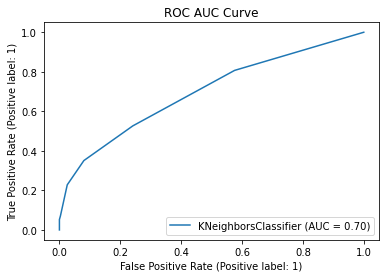

In [73]:
# ROC AUC CURVE
from sklearn.metrics import plot_roc_curve
plot_roc_curve(gs.best_estimator_,X_test,y_test)
plt.title('ROC AUC Curve')
plt.show()

 Here the final accuracy is almost 84% and the AUC score is 70% which is some what good.

# Saving the best model

In [74]:
# Saving the model in the pickle format

import joblib
joblib.dump(gs.best_estimator_,"HR_Attrition_Prediction.pkl")

['HR_Attrition_Prediction.pkl']